In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../kaggle_prediction_library/') 
import preprocess
import feature_engineering
import submission
import validation
from sklearn.model_selection import train_test_split

# from hyperopt import tpe, fmin, Trials
# import hyperopt.hp as hp

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import brier_score_loss
from sklearn.pipeline import make_pipeline



### Read in Data

In [2]:
to_predict_mens = pd.read_csv("to_predict_mens.csv")

first_round_df = to_predict_mens[(to_predict_mens.GameRound == 1)].copy()
other_rounds_df = to_predict_mens[(to_predict_mens.GameRound > 1)].copy()



### First Round Modeling

In [3]:
# Define the classifier and parameter grid
model = LogisticRegression()
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}
pipeline = make_pipeline(StandardScaler(), model)


In [4]:
def feature_set_evaluator(feature_sets, df, model, param_grid):
   
    eval_dfs = []

    for i, f in tqdm.tqdm(enumerate(feature_sets)):
        eval_df = validation.run_evaluation_framework(df, model, f, param_grid)
        eval_df["feature_set"] = [f]
        eval_dfs.append(eval_df)

    all_scores = pd.concat(eval_dfs, axis=0)
    
    return all_scores

In [5]:
first_round_df[~first_round_df.final_odds.isna()].shape, first_round_df.shape

((1248, 55), (1250, 55))

In [6]:
first_round_df = first_round_df[~first_round_df.final_odds.isna()].copy()
first_round_df = first_round_df[first_round_df.type != "Prediction"]

In [7]:
# Define the classifier and parameter grid
model = LogisticRegression()
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}
pipeline = make_pipeline(StandardScaler(), model)

eval_df = validation.run_evaluation_framework(first_round_df, pipeline, ['final_odds'], param_grid)


{'logisticregression__C': 0.1}


In [ ]:
eval_df

In [13]:
# Define the classifier and parameter grid
model = LogisticRegression()
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}
pipeline = make_pipeline(StandardScaler(), model)

eval_df = validation.run_evaluation_framework(first_round_df, pipeline, [# final_odds
                                                                        't1_adj_margin', 't2_adj_margin',
                                                                        't1_final_rank', 't2_final_rank',
                                                                        't1_OrdinalRank', 't2_OrdinalRank'
                                                                        ], param_grid)


{'logisticregression__C': 0.1}


In [14]:
eval_df

,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv
0,{'logisticregression__C': 0.1},-0.167685,"(-0.16971276751939107, -0.1656565491361524)",0.17102


In [141]:
eval_df = validation.run_evaluation_framework(first_round_df, pipeline, ["final_odds"], param_grid)

In [143]:
eval_df

,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv
0,{'logisticregression__C': 0.1},-0.165002,"(-0.16681399015259188, -0.16319078781082727)",0.167936


### Other Rounds Modeling

In [20]:
f0 = ['seed_diff', 
    't1_adj_margin', 't2_adj_margin',
    't1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank']

# f1 = ['seed_diff', 
#     't1_adj_margin', 't2_adj_margin',
#     't1_final_rank', 't2_final_rank',
#     't1_OrdinalRank', 't2_OrdinalRank',
#     'final_odds']

# f2 = ['seed_diff', 
#     't1_adj_margin', 't2_adj_margin',
#     't1_final_rank', 't2_final_rank',
#     't1_OrdinalRank', 't2_OrdinalRank',
#     'final_odds']

f3 = ['t1_adj_margin', 't2_adj_margin',
    't1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank',
    'final_odds']

f4 = ['t1_adj_margin', 't2_adj_margin',
    't1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank']

f5 = ['t1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank']

# f6 = ['t1_final_rank', 't2_final_rank']

# f7 = ['t1_OrdinalRank', 't2_OrdinalRank']

# f8 = ['t1_adj_margin', 't2_adj_margin']

f9 = ['t1_final_rank', 't2_final_rank',
      't1_adj_margin', 't2_adj_margin']

# f10 = ['final_odds']

# f11 = ['t1_OrdinalRank', 't2_OrdinalRank',
#       't1_adj_margin', 't2_adj_margin']

# f12 = ['t1_OrdinalRank', 't2_OrdinalRank',
#       't1_adj_margin', 't2_adj_margin', 'final_odds']

f13 = ['t1_adj_margin', 't2_adj_margin',
    't1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank',
    'round1_opponent_quality']

f14 = ['t1_final_rank', 't2_final_rank',
       't1_adj_margin', 't2_adj_margin',
    'round1_opponent_quality']

f15 = ['t1_final_rank', 't2_final_rank',
    'round1_opponent_quality']

f16 = ['t1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank',
    'round1_opponent_quality']

f17 = ['t1_adj_margin', 't2_adj_margin',
    't1_OrdinalRank', 't2_OrdinalRank',
    'round1_opponent_quality']

f18 = ['t1_adj_margin', 't2_adj_margin',
    't1_final_rank', 't2_final_rank',
    't1_OrdinalRank', 't2_OrdinalRank',
    'round1_opponent_rank']



In [186]:
other_rounds_df = other_rounds_df[~other_rounds_df.round1_opponent_quality.isna()].copy()
other_rounds_df = other_rounds_df[other_rounds_df.type != "Prediction"]

In [187]:
# Define the classifier and parameter grid
model = LogisticRegression()
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}
pipeline = make_pipeline(StandardScaler(), model)

eval_df = validation.run_evaluation_framework(other_rounds_df, pipeline, f4, param_grid)

In [190]:
eval_df

,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv
0,{'logisticregression__C': 0.1},-0.20365,"(-0.2053770291101562, -0.20192249289961184)",0.203605


In [53]:
import tqdm
all_scores_df = feature_set_evaluator(
    [f0,f3,f4,f5,f9,f13,f14,f15,f16,f17,f18],
    other_rounds_df, pipeline, param_grid)


0it [00:00, ?it/s]../kaggle_prediction_library/validation.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_prob"] = y_prob[:,1].copy()
../kaggle_prediction_library/validation.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_true"] = y_test.copy()
../kaggle_prediction_library/validation.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [54]:
pd.set_option('display.max_colwidth', None)
all_scores_df["rolling_season_cv_rank"] = all_scores_df["rolling_season_cv"].rank()
all_scores_df["mean_repeated_cv_score_rank"] = all_scores_df["mean_repeated_cv_score"].rank(ascending=False)
all_scores_df.sort_values(by="mean_repeated_cv_score", ascending=False)


,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv,feature_set,rolling_season_cv_rank,mean_repeated_cv_score_rank
0,{'logisticregression__C': 0.05},-0.199605,"(-0.20176035334632691, -0.19744911357613415)",0.197354,"[t1_adj_margin, t2_adj_margin, t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank]",3.0,1.0
0,{'logisticregression__C': 0.05},-0.199846,"(-0.20181456163295913, -0.19787659292543208)",0.197668,"[t1_adj_margin, t2_adj_margin, t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank, round1_opponent_rank]",5.5,2.0
0,{'logisticregression__C': 0.05},-0.199927,"(-0.20177472462095283, -0.19807881839396466)",0.197486,"[t1_adj_margin, t2_adj_margin, t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank, final_odds]",4.0,3.0
0,{'logisticregression__C': 0.05},-0.199960,"(-0.20206617481383224, -0.19785475834197133)",0.197668,"[t1_adj_margin, t2_adj_margin, t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank, round1_opponent_quality]",5.5,4.0
0,{'logisticregression__C': 0.05},-0.200036,"(-0.20214216466595827, -0.19793026926151128)",0.197749,"[seed_diff, t1_adj_margin, t2_adj_margin, t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank]",7.0,5.0
0,{'logisticregression__C': 0.05},-0.200084,"(-0.20212546866159783, -0.19804348202780178)",0.196643,"[t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank]",1.0,6.0
0,{'logisticregression__C': 0.1},-0.200286,"(-0.2022259294507798, -0.19834614714823293)",0.196847,"[t1_final_rank, t2_final_rank, t1_OrdinalRank, t2_OrdinalRank, round1_opponent_quality]",2.0,7.0
0,{'logisticregression__C': 0.05},-0.200675,"(-0.20259923711291888, -0.19875033404647213)",0.199352,"[t1_final_rank, t2_final_rank, t1_adj_margin, t2_adj_margin]",9.0,8.0
0,{'logisticregression__C': 0.05},-0.201039,"(-0.2029744890542061, -0.19910362436360443)",0.199655,"[t1_final_rank, t2_final_rank, t1_adj_margin, t2_adj_margin, round1_opponent_quality]",11.0,9.0
0,{'logisticregression__C': 0.05},-0.201594,"(-0.20345705325918145, -0.19973093951560245)",0.199377,"[t1_adj_margin, t2_adj_margin, t1_OrdinalRank, t2_OrdinalRank, round1_opponent_quality]",10.0,10.0


### Tree Based

In [101]:
other_rounds_df["t1_percent3"] = other_rounds_df['t1_FGA3'] / other_rounds_df['t1_FGA']
other_rounds_df["t2_percent3"] = other_rounds_df['t2_FGA3'] / other_rounds_df['t2_FGA']

In [99]:
other_rounds_df['t1_pos'] = other_rounds_df.apply(lambda row: 0.96*(row.t1_FGA + row.t1_TO + 0.44*row.t1_FTA - row.t1_OR), axis=1)
other_rounds_df['t2_pos'] = other_rounds_df.apply(lambda row: 0.96*(row.t2_FGA + row.t2_TO + 0.44*row.t2_FTA - row.t2_OR), axis=1)


In [105]:
other_rounds_df["t1_ft_percent"] = other_rounds_df['t1_FTM'] / other_rounds_df['t1_FTA']
other_rounds_df["t2_ft_percent"] = other_rounds_df['t2_FTM'] / other_rounds_df['t2_FTA']

In [115]:
other_rounds_df["t1_ast_percent"] = other_rounds_df['t1_Ast'] / other_rounds_df['t1_pos']
other_rounds_df["t2_ast_percent"] = other_rounds_df['t2_Ast'] / other_rounds_df['t2_pos']

In [116]:
other_rounds_df[features]

,t1_percent3,t2_percent3,t1_pos,t2_pos,t1_ft_percent,t2_ft_percent,t1_ast_percent,t2_ast_percent
0,0.305435,0.343805,73.268571,66.152052,0.701429,0.721204,0.240797,0.237966
1,0.252412,0.334074,70.039040,65.043406,0.674208,0.675466,0.223209,0.225160
2,0.341436,0.340314,70.031360,68.563862,0.709026,0.765753,0.197531,0.227827
3,0.226859,0.221212,70.577920,65.988414,0.665746,0.669737,0.237090,0.235674
4,0.271111,0.354223,64.417371,64.621006,0.770045,0.658970,0.253370,0.212654
...,...,...,...,...,...,...,...,...
1173,0.359096,0.337778,65.296291,67.430400,0.743169,0.724398,0.214407,0.228994
1174,0.303413,0.374379,64.913214,68.179782,0.684654,0.772194,0.184331,0.217340
1175,0.460172,0.337778,61.935709,67.430400,0.823322,0.724398,0.194728,0.228994
1176,0.365924,0.374379,66.144000,68.179782,0.728814,0.772194,0.253902,0.217340


In [125]:
# Define the classifier and parameter grid
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler step
    ('gbt', GradientBoostingClassifier())  # RandomForestClassifier step
])

param_grid = {
    #'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'gbt__learning_rate': [.005, .01, 0.025, 0.05],  # Step size shrinkage to prevent overfitting
    'gbt__max_depth': [2, 5],  # Maximum depth of the individual trees
    #'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'gbt__min_samples_leaf': [10, 25],  # Minimum number of samples required to be at a leaf node
    'gbt__subsample': [0.8]  # Fracsion of samples used for fitting the individual base learners
}

features = [
't1_adj_margin', 
't2_adj_margin',
# 't1_final_rank', 
# 't2_final_rank',
# 't1_OrdinalRank', 
# 't2_OrdinalRank',
# 't1_percent3',
# 't2_percent3',
# 't1_pos',
# 't2_pos',
# 't1_ft_percent',
# 't2_ft_percent',
# 't1_ast_percent',
# 't2_ast_percent',
# 'GameRound',
# 'round1_opponent_quality',
# 't1_adj_oe',
# 't1_adj_de',
# 't2_adj_oe',
# 't2_adj_de',
# 't1_FGA3',
# 't2_FGA3',
# 'final_odds',
# 't1_FGM',
# 't1_FGA',
# 't1_FGM3',
# 't1_FGA3',
# 't1_OR',
# 't1_Ast',
# 't1_TO',
# 't1_Stl',
# 't1_PF',
# 't1_PointDiff',
# 't2_FGM',
# 't2_FGA',
# 't2_FGM3',
# 't2_FGA3',
# 't2_OR',
# 't2_Ast',
# 't2_TO',
# 't2_Stl',
# 't2_PF',
# 't2_PointDiff',
# 'seed_diff'
]

eval_df = validation.run_evaluation_framework(other_rounds_df, pipeline, features, param_grid,
                                              repeated_kfold_n_splits=5, 
                                              repeated_kfold_n_repeats=1)


In [126]:
eval_df.best_params.loc[0]

{'gbt__learning_rate': 0.025,
 'gbt__max_depth': 2,
 'gbt__min_samples_leaf': 25,
 'gbt__subsample': 0.8}

### Round2 prediction with full dataset


This analysis shows that the round2+ model does better when we use all the data for training 
This can by using the flag include_round1_in_training

In [21]:
def rolling_season_cv(model, train_input, features, label='Outcome', cv_start=2007, return_preds=False,
                      include_round1_in_training=False):
    ''' returns estimate for model performance using shifted validation'''
    
    scores = []

    preds_dfs = []

    for n, season in enumerate(train_input.Season.unique()):
        
        if season >= cv_start:

            if include_round1_in_training:
                train = train_input[(train_input.Season < season)                                    
                                    ].copy()
            
            else:
                train = train_input[(train_input.Season < season)
                                    & (train_input.GameRound != 1)
                                    ].copy()

                
            test = train_input[(train_input.Season == season)
                               & (train_input.GameRound > 1)
                               ].copy()

            X_train = train[features].copy()
            X_test = test[features].copy()
            y_train = train[label].copy()
            y_test = test[label].copy()

            model.fit(X_train[features], y_train)
            y_prob = model.predict_proba(X_test[features])

            test["y_prob"] = y_prob[:,1].copy()
            test["y_true"] = y_test.copy()
            preds_dfs.append(test)

            loss = brier_score_loss(y_test, y_prob[:,1])
            scores.append((season, loss))

    validation_df = pd.DataFrame(scores, columns = ['season', 'score']).sort_values(by = 'score')
    avg_validation_score = validation_df.score.mean()

    all_preds = pd.concat(preds_dfs,axis =0)

    if return_preds:
        return avg_validation_score, all_preds
    else:
        return avg_validation_score

In [22]:
full_df = pd.concat([first_round_df, other_rounds_df], axis=0)

In [23]:
full_df = full_df[full_df.type == 'Historical']

In [24]:
# Define the classifier and parameter grid
model = LogisticRegression(C=0.05)
pipeline = make_pipeline(StandardScaler(), model)
param_grid = {
    'logisticregression__C': [.005, 0.001, .05, 0.01, 0.1],
}

In [25]:
# using everything to predict round 2+ 
rolling_season_cv(pipeline, full_df, f4, label='Outcome', cv_start=2006, return_preds=False, include_round1_in_training=True)

0.1980506712800857

In [26]:
# using only round 2+ to predict round 2+
rolling_season_cv(pipeline, full_df, f4, label='Outcome', cv_start=2006, return_preds=False, include_round1_in_training=False)

0.19901695366896152

In [217]:
eval_df = validation.run_evaluation_framework(other_rounds_df, pipeline, f4, param_grid)

In [218]:
eval_df

,best_params,mean_repeated_cv_score,repeated_cv_confidence_interval,rolling_season_cv
0,{'logisticregression__C': 0.05},-0.199605,"(-0.2017359669768168, -0.1974738755659942)",0.197354


### Round1 Prediction with Full Dataset - Blend with Odds Preds

This analysis suggests:
1. My model's prediction of round 1 is better when we include all the data
2. We can do better than either one individually by blending the two 
3. 70%-80% vegas, 20-30% my model appears to be the optimal blend (exact proportion seems to vary based on where we set the year threshold)


In [93]:
def rolling_season_cv(model, train_input, features, label='Outcome', cv_start=2007, return_preds=False,
                      include_r2plus_in_training=True):
    '''returns estimate for model performance using shifted validation'''
    
    scores = []

    preds_dfs = []

    for n, season in enumerate(train_input.Season.unique()):
        
        if season >= cv_start:
            
            if include_r2plus_in_training:
                train = train_input[(train_input.Season < season)                                    
                                        ].copy()
            else:
                train = train_input[(train_input.Season < season)  
                                    & (train_input.GameRound == 1)                                  
                                        ].copy()

            test = train_input[(train_input.Season == season)
                               & (train_input.GameRound == 1)
                               ].copy()

            X_train = train[features].copy()
            X_test = test[features].copy()
            y_train = train[label].copy()
            y_test = test[label].copy()

            model.fit(X_train[features], y_train)
            y_prob = model.predict_proba(X_test[features])

            test["y_prob"] = y_prob[:,1].copy()
            test["y_true"] = y_test.copy()
            preds_dfs.append(test)

            loss = brier_score_loss(y_test, y_prob[:,1])
            scores.append((season, loss))

    validation_df = pd.DataFrame(scores, columns = ['season', 'score']).sort_values(by = 'score')
    avg_validation_score = validation_df.score.mean()

    all_preds = pd.concat(preds_dfs, axis=0)

    if return_preds:
        return avg_validation_score, all_preds
    else:
        return avg_validation_score

In [109]:
# exclude r2+ from training
avg_validation_score, all_preds_f4 = rolling_season_cv(model, full_df, f4, label='Outcome', cv_start=2010, return_preds=True,
                                                       include_r2plus_in_training=False)

In [110]:
avg_validation_score

0.17613870462477846

In [111]:
# include r2+ from training
avg_validation_score, all_preds_f4 = rolling_season_cv(model, full_df, f4, label='Outcome', cv_start=2010, return_preds=True,
                                                       include_r2plus_in_training=True)

In [112]:
avg_validation_score

0.17495514735846673

In [113]:
# Vegas odds only
avg_validation_score, all_preds_odds = rolling_season_cv(model, full_df[full_df.final_odds.notnull()], ["final_odds"], label='Outcome', cv_start=2010, return_preds=True,
                                                         include_r2plus_in_training=False)

In [114]:
avg_validation_score

0.17255525754629095

In [115]:
# Combine both predictions
all_preds_odds = all_preds_odds[["Team1", "Team2", "Season", "t1_TeamName", "t2_TeamName", 
                                 "t1_Seed", "t2_Seed",
                                 "y_prob", "y_true"]].copy()
all_preds_odds.columns = ["Team1", "Team2", "Season", "t1_TeamName", "t2_TeamName",  "t1_Seed", "t2_Seed", "y_prob_odds", "y_true"]
all_preds_f4 = all_preds_f4[["Team1", "Team2", "Season", "y_prob"]].copy()
all_preds_f4.columns = ["Team1", "Team2", "Season", "y_prob_f4"]
combined = all_preds_odds.merge(all_preds_f4, how="left", on=["Team1", "Team2", "Season"])

In [116]:
combined.head()

,Team1,Team2,Season,t1_TeamName,t2_TeamName,t1_Seed,t2_Seed,y_prob_odds,y_true,y_prob_f4
0,1124,1358,2010,Baylor,Sam Houston St,3.0,14.0,0.862315,1.0,0.938658
1,1139,1431,2010,Butler,UTEP,5.0,12.0,0.612814,1.0,0.563221
2,1140,1196,2010,BYU,Florida,7.0,10.0,0.714564,1.0,0.785012
3,1242,1250,2010,Kansas,Lehigh,1.0,16.0,0.989906,1.0,0.991883
4,1243,1317,2010,Kansas St,North Texas,2.0,15.0,0.944974,1.0,0.971814


In [117]:
# Vegas 
brier_score_loss(combined["y_true"], combined["y_prob_odds"])

0.17242926154609525

In [118]:
# Me - after filtering out the handful of records with missing odds data
brier_score_loss(combined["y_true"], combined["y_prob_f4"])

0.17487596902611768

In [119]:
results = []

for i in range(0, 101):
    i = i/100
    w1 = i
    w2 = 1 - i
    combined["combined_prob"] = combined["y_prob_odds"] * w1 + combined["y_prob_f4"] * w2
    score = brier_score_loss(combined["y_true"], combined["combined_prob"])
    results.append([w1, w2, score])


In [120]:
score_df = pd.DataFrame(results, columns = ["Odds Weight", "F4 Weight", "Score"])

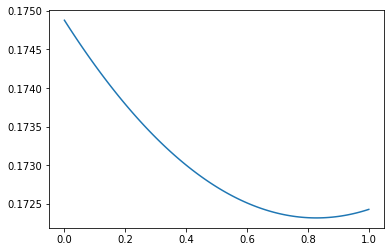

In [121]:
import matplotlib.pyplot as plt
plt.plot(score_df["Odds Weight"], score_df.Score)

In [124]:
score_df.sort_values(by="Score").head(20)

,Odds Weight,F4 Weight,Score
83,0.83,0.17,0.172319
82,0.82,0.18,0.172319
84,0.84,0.16,0.172319
81,0.81,0.19,0.172320
85,0.85,0.15,0.172321
80,0.80,0.20,0.172322
86,0.86,0.14,0.172323
79,0.79,0.21,0.172324
87,0.87,0.13,0.172325
78,0.78,0.22,0.172327


In [352]:
combined["diff"] = combined["y_prob_odds"] - combined["y_prob_f4"]
combined["abs_diff"] = abs(combined["diff"])

In [353]:
combined["who_was_right"] = np.where(
                                (combined.y_true == 1) & (combined["diff"] > 0), "vegas",
                                np.where((combined.y_true == 1) & (combined["diff"] < 0), "me",
                                np.where((combined.y_true == 0) & (combined["diff"] > 0), "me",
                                np.where((combined.y_true == 0) & (combined["diff"] < 0), "vegas", "tie"                                    
))))

In [354]:
combined.sort_values(by="abs_diff", ascending=False).head(50)

,Team1,Team2,Season,t1_TeamName,t2_TeamName,t1_Seed,t2_Seed,y_prob_odds,y_true,y_prob_f4,combined_prob,diff,abs_diff,who_was_right
336,1153,1400,2012,Cincinnati,Texas,6.0,11.0,0.652904,1.0,0.447886,0.652904,0.205017,0.205017,vegas
368,1400,1153,2012,Texas,Cincinnati,11.0,6.0,0.347322,0.0,0.552117,0.347322,-0.204795,0.204795,vegas
33,1330,1139,2007,Old Dominion,Butler,12.0,5.0,0.410709,0.0,0.208851,0.410709,0.201858,0.201858,me
1,1139,1330,2007,Butler,Old Dominion,5.0,12.0,0.592114,1.0,0.791148,0.592114,-0.199034,0.199034,me
354,1452,1211,2012,West Virginia,Gonzaga,10.0,7.0,0.589345,0.0,0.391105,0.589345,0.198240,0.198240,me
322,1211,1452,2012,Gonzaga,West Virginia,7.0,10.0,0.410896,1.0,0.608898,0.410896,-0.198002,0.198002,me
667,1348,1166,2017,Rhode Island,Creighton,11.0,6.0,0.579621,1.0,0.385137,0.579621,0.194483,0.194483,vegas
699,1166,1348,2017,Creighton,Rhode Island,6.0,11.0,0.420406,0.0,0.614862,0.420406,-0.194456,0.194456,vegas
687,1268,1462,2017,Maryland,Xavier,6.0,11.0,0.579621,0.0,0.389962,0.579621,0.189659,0.189659,me
655,1462,1268,2017,Xavier,Maryland,11.0,6.0,0.420406,1.0,0.610037,0.420406,-0.189631,0.189631,me


In [357]:
analysis = combined.groupby("who_was_right").count()[["Team1"]].reset_index()
analysis.columns = ["who_was_right", "count"]
analysis["perc"] = analysis["count"] / analysis["count"].sum()
analysis

,who_was_right,count,perc
0,me,475,0.496862
1,vegas,481,0.503138


In [361]:
analysis = combined.groupby(["who_was_right", "t1_Seed"]).count()[["Team1"]].reset_index()
analysis.columns = ["who_was_right", "t1_Seed", "count"]
analysis.sort_values(by="t1_Seed")

,who_was_right,t1_Seed,count
0,me,1.0,32
16,vegas,1.0,28
17,vegas,2.0,33
1,me,2.0,27
18,vegas,3.0,31
2,me,3.0,29
3,me,4.0,37
19,vegas,4.0,23
4,me,5.0,29
20,vegas,5.0,31


In [ ]:
# Interesting that the only one where there is a big gap is the 6 vs. 11 games